# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$. 

**5.** При каких условиях дисперсии в пункте 4 конечны? Подумайте и ответьте на вопрос, как ведет себя дисперсия предсказания в многомерном случае если матрица $X^T X$ близка к вырожденной.



*Замечания.* 
1. В пунктах 3-5 речь идет о $\widehat{\theta}$, которая является *решением* задачи метода наименьших квадратов. Поэтому пользуйтесь явной формулой этого решения, а не формулами методов вычисления решения.
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

1) $\; \widehat{\theta} = (X^{T}X)^{-1}X^TY$

Так как $Y_i = \theta x_i + \varepsilon_i,$, то X - просто столбец, значит $X^TX = \sum\limits_{i=1}^{n} x_i^2$ - просто число. Значит итоговый результат: 

$$\; \widehat{\theta} = (\sum\limits_{i=1}^{n} x_i^2)^{-1} \cdot \sum\limits_{i=1}^{n}x_iy_i = \frac{\sum\limits_{i=1}^{n}x_iy_i}{\sum\limits_{i=1}^{n} x_i^2}$$

2) Выпишем общую формулу градиентного спуска GD (была выведена на паре):
$$\theta_{t+1} = \theta_{t} - \eta \sum \limits_{i=1}^{n}x_i(x_i^T \theta_t - y_i), \text{где } x_i - \text{i-ая строка матрицы X}$$

Распишем теперь для нашего частного случая, когда матрица x - это столбец, тогда $x_i = x_i^T$ - это просто число:

$$\theta_{t+1} = \theta_{t} - \eta \sum \limits_{i=1}^{n} (x_i^2 \theta_t - x_i y_i)$$

Выпишем общую формулу стохастического градиентного спуска SGD (тоже была выведена на паре):
$$\theta_{t+1} = \theta_{t} - \eta \frac{n}{k} \sum \limits_{i=1}^{k}x_{i_j}(x_{i_j}^T \theta_t - y_{i_j}), \text{где } i_1, i_2, ..., i_k \in \mathbb{U} \{1, ..., n\} - \text{из равномерного распределения от 1 до k с повторениями}$$

Распишем теперь для нашего частного случая, когда матрица x - это столбец, тогда $x_i = x_i^T$ - это просто число:
$$\theta_{t+1} = \theta_{t} - \eta \frac{n}{k} \sum \limits_{i=1}^{k}(x_{i_j}^2 \theta_t - x_{i_j} y_{i_j}), \text{где } i_1, i_2, ..., i_k \in \mathbb{U} \{1, ..., n\} - \text{из равномерного распределения от 1 до k с повторениями}$$

Множитель $\frac{n}{k}$ зачастую вносят в $\eta$ и не пишут.

3) $\mathbb{E}\epsilon_i  = 0, \; x \in \mathbb{R}$

Так как $x_i$ - неслучайная величина, то $\mathbb{E} x_i = x_i$

$y_i = \theta x_i + \epsilon_i, \;\; \mathbb{E}y_i = \mathbb{E} (\theta x_i) + \mathbb{E} \epsilon_i = \mathbb{E} (\theta x_i) = x_i \mathbb{E} \theta $

$$\mathbb{E}\widehat{\theta} = \mathbb{E}(((X^{T}X)^{-1}X^TY) = \mathbb{E}\bigg(\frac{\sum\limits_{i=1}^{n}x_iy_i}{\sum\limits_{i=1}^{n} x_i^2}\bigg) = \frac{\sum\limits_{i=1}^{n}x_i \mathbb{E}y_i}{\sum\limits_{i=1}^{n} x_i^2} = \frac{\sum\limits_{i=1}^{n}x_i x_i \mathbb{E} \theta}{\sum\limits_{i=1}^{n} x_i^2} = \frac{\sum\limits_{i=1}^{n}x_i^2 \mathbb{E} \theta}{\sum\limits_{i=1}^{n} x_i^2} = \mathbb{E} \theta = \theta$$

$\mathbb{E}\widehat{\theta} = \theta, \;\; \mathbb{E}\widehat{y}(x) = \mathbb{E}(\widehat{\theta} \cdot x) = x \cdot \mathbb{E} \widehat{\theta} = x \cdot \theta$

4) $\mathbb{E}\epsilon_i  = 0, \;, \mathbb{D}\epsilon_i  = \sigma^2,  \; x \in \mathbb{R}$

$x_i$ - неслучайная величина

$y_i = \theta x_i + \epsilon_i, \;\; \mathbb{D}y_i = \mathbb{D} (\theta x_i) + \mathbb{D} \epsilon_i = x_i^2 \mathbb{D} \theta + \sigma^2 = \sigma^2$

$$\mathbb{D}\widehat{\theta} = \mathbb{D}(((X^{T}X)^{-1}X^TY) = \mathbb{D}\bigg(\frac{\sum\limits_{i=1}^{n}x_iy_i}{\sum\limits_{i=1}^{n} x_i^2}\bigg) = \frac{\sum\limits_{i=1}^{n}x_i^2 \mathbb{D}y_i}{(\sum\limits_{i=1}^{n} x_i^2)^2} = \frac{\mathbb{D}y_i}{\sum\limits_{i=1}^{n} x_i^2} = \frac{\sigma^2}{\sum\limits_{i=1}^{n} x_i^2}$$

$$\mathbb{D}\widehat{y}(x) = \mathbb{D}(\widehat{\theta} \cdot x) = x^2 \cdot \mathbb{D} \widehat{\theta} = x^2 \cdot \frac{\sigma^2}{\sum\limits_{i=1}^{n} x_i^2}$$

5) Для начала, рассмотрим одномерный случай, в этом случае матрица $X^T X$ - это просто число. Так как $X^T X$ - близка к вырожденной - это очень маленькое число, значит $\frac{1}{X^T X} \longrightarrow \infty$.

Вернемся к многомерному случаю, нам нужно искать обратную матрицу $X^T X$. В формуле поиска элемента обратной матрицы в знаменателе есть множитель $det(X^T X)$, это число очень маленькое, так как матрица близка к вырожденной, значит элемента получившейся обратной матрицы очень большие. Получается, что дисперсия предсказания в многомерном случае, при близкой к вырожденной матрице $X^T X$, очень большая.

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

![bike2.jpg](attachment:bike2.jpg)

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [ ]:
data = pd.read_csv('/Users/carevivan/Downloads/Bike-Sharing-Dataset/day.csv')
data = data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum','windspeed', 'cnt']]
train, test = train_test_split(data, test_size=0.2)
train.head(5)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
236,3,8,0,4,1,2,0.684167,0.645854,0.771667,0.210833,3542
143,2,5,0,2,1,2,0.660000,0.604813,0.740833,0.207092,4492
371,1,1,0,6,0,1,0.393333,0.390779,0.531667,0.174758,4521
545,3,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,5463
207,3,7,0,3,1,1,0.775000,0.690667,0.402917,0.183463,4656


#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строит информативные графики.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

In [ ]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признакcategorial_features = ['mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

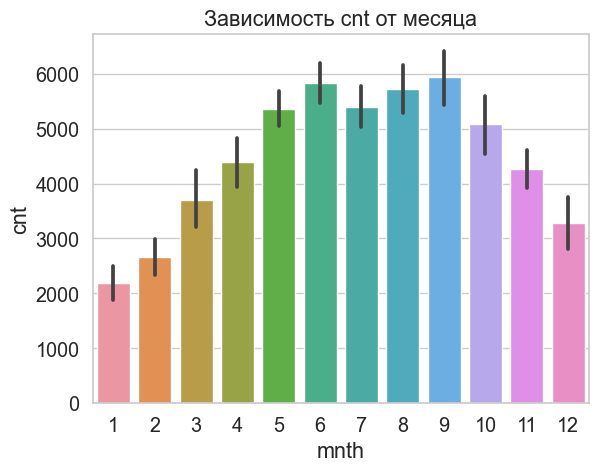

In [ ]:
sns.barplot(x=train['mnth'], y=train['cnt'])
plt.title("Зависимость cnt от месяца")
None

 Из графика явно видно, что зависимость cnt от месяца близка к квадратичной, значит для анализа данной зависимости можно было бы рассмотреть квадартичную зависимость ($x^2$)

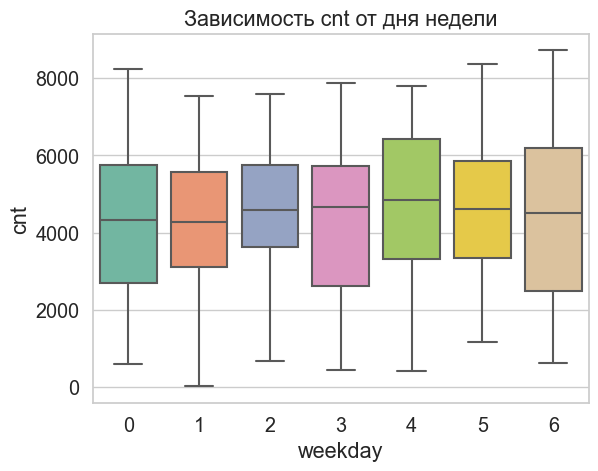

In [ ]:
sns.boxplot(x=train['weekday'], y=train['cnt'])
plt.title("Зависимость cnt от дня недели")
None

Из графика можно сделать вывод, что cnt не сильно зависит от дня недели, то есть зависимость практически константа, а значит линейная.

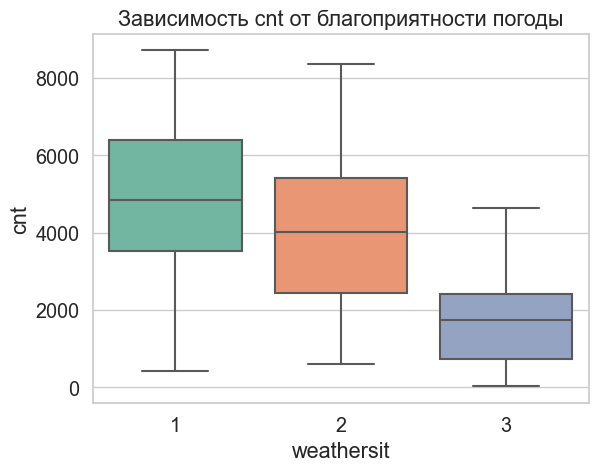

In [ ]:
sns.boxplot(x=train['weathersit'], y=train['cnt'])

plt.title("Зависимость cnt от благоприятности погоды")
None

Зависимость cnt от благоприятности погоды также линейная, cnt убывает при возрастании weathersit. Это логично, так как weathersit равный соответсвует самой лучшей погоду.

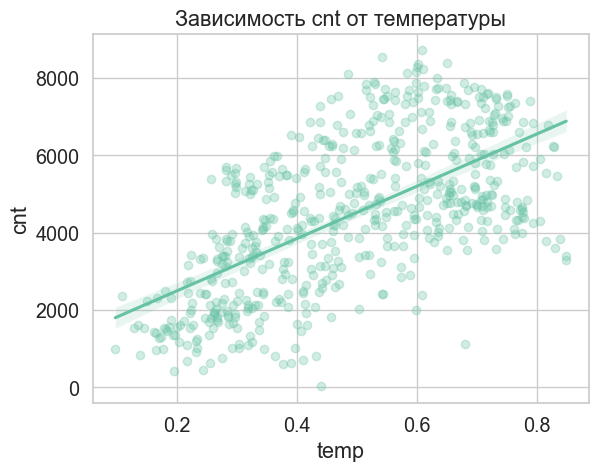

In [ ]:
sns.regplot(x=train['temp'], y=train['cnt'], fit_reg = True, scatter_kws={'alpha':0.3})
plt.title("Зависимость cnt от температуры")
None

Зависимость cnt от температуры также очень напоминает линейную. При возрастании температуры, возрастает и cnt.

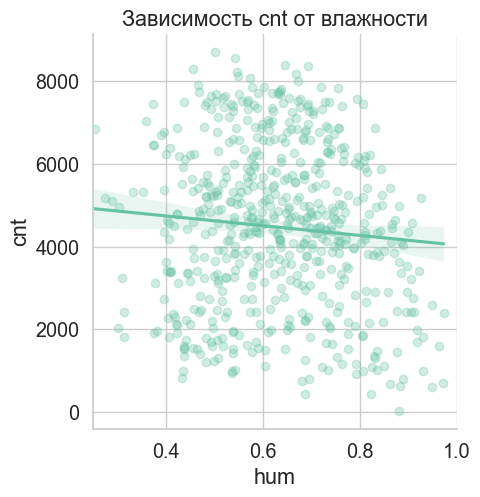

In [ ]:
sns.lmplot(x='hum', y='cnt', data=train, scatter_kws={'alpha':0.3})
plt.xlim((0.25, 1.0))
plt.title("Зависимость cnt от влажности")
None

Зависимость cnt от влажности не имеет какого-то явного вида, но ее также можно апроксимировать прямой. Это и логично, потому что людям гораздо важнее другие признаки (например выходной день, температура и нет ли дождя) и кататься приятно практически при любой влажности.

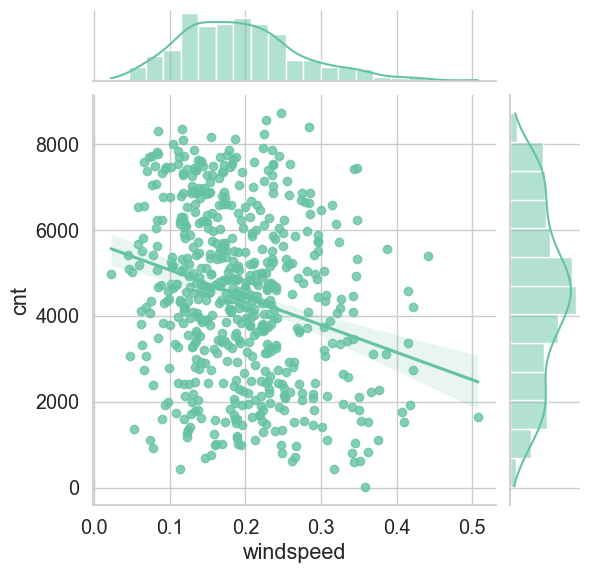

In [ ]:
sns.jointplot(data=train, x='windspeed', y='cnt', kind='reg')
#suptitle("Your title here")
#plt.title("Зависимость cnt от благоприятности погоды")
None

Зависимость cnt от скорости ветра также не имеет явного вида.

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

Выводы про каждый график, находятся сразу под ним.

В целом наша будущая модель подходит под данную задачу, так как большая часть зависимостей примерно линейные, также, исходя из графиков, особых выбросов в данных нету.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**a)** 

Как мы выяснили в предыдущем пункте, выбросов в данных практически нет, поэтому я решил их не убирать.

Кроме этого, необходимо закодировать категориальные признаки.

Реализуйте данную процедуру.

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
train_cat = encoder.fit_transform(train[categorial_features])

In [ ]:
X_train = np.hstack([train[real_features], train_cat])

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_feature])

LinearRegression()

In [ ]:
model.coef_

array([ -509.32261146,  7602.45620927, -3251.68180621, -3832.37855952,
        1056.49716796,  1034.65556033,  1724.43180106,   113.98078253,
         351.59382175,  -109.57637066,   128.17569482,  -349.59311676,
       -1105.28431172,  -381.99540626,   418.55723546,    32.73841955,
        -338.58426322,  -199.58884148,    31.8607824 ,  -121.96466252,
          78.83250925,    64.55111184,   128.79482084,    60.61489955,
         360.78155129,   178.96789656,  -209.95755344, -1839.87262635])

In [ ]:
model.intercept_

2992.670093796295

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [ ]:
test_cat = encoder.transform(test[categorial_features])

X_test = np.hstack([test[real_features], test_cat])
test_preds = model.predict(X_test)

Посчитаем ошибку предсказания на тестовой выборке по метрике RMSE:

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())
root_mean_squared_error(test[target_feature], test_preds)

1292.7701211430428

Посчитаем ошибку предсказания на тестовой выборке по метрике MAE:

In [ ]:
def mean_absolute_error(y_true, y_pred):
    return metrics.mean_absolute_error(y_true, y_pred)
mean_absolute_error(test[target_feature], test_preds)

1102.864113793744

Посчитаем ошибку предсказания на тестовой выборке по метрике MAPE:

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
mean_absolute_percentage_error(test[target_feature], test_preds)

30.155487879394933

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Посчитаем оценку по явной формуле $\widehat{\theta} = (X^{T}X)^{-1}X^TY$, так как необходимо учесть константный признак, добавим к матрице X единичный столбец в начало (дальше тоже делаю это):

In [ ]:
Y = train['cnt']
X_train_1 = np.copy(X_train)
X_train_1 = np.insert(X_train_1, 0, 1, axis=1)
tmp = (np.linalg.inv(X_train_1.T @ X_train_1) @ X_train_1.T) @ Y

Посчитаем предсказание $\widehat{y} = X^T\widehat{\theta}$

In [ ]:
X_test_1 = np.copy(X_test)
X_test_1 = np.insert(X_test_1, 0, 1, axis=1)
res = X_test_1 @ tmp

Посчитаем метрики (RMSE, MAE, MAPE) и оценим качество построенной модели:

In [ ]:
root_mean_squared_error(test[target_feature], res)

81248.81950664592

In [ ]:
mean_absolute_error(test[target_feature], res)

31811.528701659965

In [ ]:
mean_absolute_percentage_error(test[target_feature], res)

755.356985492706

Получили очень плохие значения, значит наша модель работает неточно. Скорее всего это случилось из-за того, что некоторые признаки сильно зависимы между собой, например месяц и сезон, температура и температура по ощущениям и другие, следствие этому - матрица $X^TX$ близка к вырожденной.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Удалим из исходного дата фрейма зависимые признаки и закодируем категориальные признаки:

In [ ]:
train_part = train[['mnth', 'weekday', 'workingday', 'atemp', 'hum', 'cnt']]
test_part = test[['mnth', 'weekday', 'workingday', 'atemp', 'hum', 'cnt']]
encoder = OneHotEncoder(drop='first', sparse=False)
train_cat_1 = encoder.fit_transform(train_part[['mnth', 'weekday', 'workingday']])
X_train_2 = np.hstack([train_part[['atemp', 'hum']], train_cat_1])

In [ ]:
test_cat_1 = encoder.transform(test_part[['mnth', 'weekday', 'workingday']])
X_test_2 = np.hstack([test_part[['atemp', 'hum']], test_cat_1])

Опять же посчитаем оценку по явной формуле $\widehat{\theta} = (X^{T}X)^{-1}X^TY$ и получим предсказание $\widehat{y} = X^T\widehat{\theta}$

In [ ]:
Y = train_part['cnt']
X_train_2 = np.insert(X_train_2, 0, 1, axis=1)
X_test_2 = np.insert(X_test_2, 0, 1, axis=1) 
tmp_2 = np.linalg.inv(X_train_2.T @ X_train_2) @ X_train_2.T @ Y
res_2 = X_test_2 @ tmp_2

Оценим теперь качество полученной модели, для этого посчитаем метрики RMSE, MAE, MAPE:

In [ ]:
root_mean_squared_error(test_part['cnt'], res_2)

1322.1172308003493

In [ ]:
mean_absolute_error(test_part['cnt'], res_2)

1077.4019888588189

In [ ]:
mean_absolute_percentage_error(test_part['cnt'], res_2)

27.53928912849353

Сделайте выводы.

**Выводы:**

Получили модель с хорошей точностью, с оценками немного отличающимися от оценок, полученных сначала при помощи sklearn. Получается убрав зависимые признаки, мы получили достаточно точную модель, значит наша гипотеза, о том, что сначала были получены неверные оценки, из-за зависимости некоторых признаков и вырожденности матрицы, верна. 

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

$$F(\theta) = \| Y - X\theta \|^2 + \lambda \| \theta \|^2 = (Y - X\theta)^T(Y - X\theta) + \lambda \theta^T\theta = YY^T - 2Y^TX\theta + \theta^TX^TX\theta + \lambda\theta^T\theta \longrightarrow \min_\theta,$$

$$\nabla F(\theta) = 0 - 2X^TY + 2X^TX\theta+\lambda \cdot 2\theta = 0,\;  \text{так как минимум функции}  $$

$$2X^TY = (2X^TX+2\lambda E)\theta \;\; \Rightarrow \;\; \theta = (X^TX + \lambda E)^{-1} X^TY$$

Ridge-регрессия помогает избавиться от проблемы вырожденности/обратимости матрицы. Матрица близка к вырожденной, когда некоторые из собственных значений $\lambda_i$ близки к нулю. В нашем случае, добавка $\lambda E$ увеличит все собственные значение на $\lambda$ и отодвинет их от нуля.

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

Запишем шаг GD: $\theta_{t+1} = \theta_{t} - \eta \nabla F(\theta_t)$, где $\eta$ - величине шага.

$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta \;\;\; \Rightarrow \;\;\; \nabla F(\theta) = 2X^T(X\theta - Y) + 2\lambda\theta$$

Тогда шаг градиентного спуска определяется так: $\theta_{t+1} = \theta_{t} - \eta \cdot (X^T(X\theta - Y) + \lambda\theta)$
Расписав произведение матриц, получим:

$$\theta_{t+1} = \theta_{t} - \eta \cdot \sum\limits_{i = 1}^{n} x_i^T (x_i \theta_t - y_i) - \eta \lambda \theta_t = \theta_{t} (1 - \eta \lambda) - \sum\limits_{i = 1}^{n} x_i^T (x_i \theta_t - y_i) ,  \; \text{где $x_i$ - i-ая строка в матрице X}$$

Запишем теперь шаг стохастического градиентного спуска SGD:

$$\theta_{t+1} = \theta_{t} - \eta \cdot \frac{n}{k} \cdot \sum\limits_{j = 1}^{k} x_{i_j}^T (x_{i_j} \theta_t - y_{i_j}) - \eta \lambda \theta_t = \theta_{t} (1 - \eta \lambda) - \sum\limits_{j = 1}^{k} x_{i_j}^T (x_{i_j} \theta_t - y_{i_j}), \; $$
$\text{где } i_1, i_2, ..., i_k \in \mathbb{U} \{1, ..., n\} - \text{из равномерного распределения от 1 до k с повторениями}$

Множитель $\frac{n}{k}$ зачастую вносят в $\eta$ и не пишут.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

Стандартизация в ridge-регрессии необходима для того, чтобы, если вдруг один признак окажется очень большой, то при добавлении матрицы $\lambda E$ практически ничего не изменится и итоговая матрица все равно будет вырожденной.
Например, у нас есть в таблице признак зарплата, она измеряется в рублях, значения там сильно большие (тысячи), значит вклад $\lambda E$ при lambda не очень большом будет незначительный и матрица все равно будет вырожденной.


### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

![ubike.png](attachment:ubike.png)

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [ ]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept

        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.
        if self.fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        scal = StandardScaler()
        scal.fit(X)
        scal.transform(X)
        self.theta = np.linalg.inv(X.T @ X + self.lambd * np.identity(X.shape[1])) @ X.T @ Y
        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        if self.fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        scal = StandardScaler()
        scal.fit(X)
        scal.transform(X)
        predictions = X @ self.theta
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/ML_pipeline.pdf">презентации</a> с занятия.

In [ ]:
tmp, test_new = train_test_split(data, test_size=0.2)
train_new, valid_new = train_test_split(tmp, test_size=0.25)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее в данном задании.

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
train_cat_new = encoder.fit_transform(train_new[categorial_features])
X_train = np.hstack([train_new[real_features], train_cat_new])

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
valid_cat_new = encoder.fit_transform(valid_new[categorial_features])
X_valid = np.hstack([valid_new[real_features], valid_cat_new])

Проверим как работает модель на самомо дефолтном примере, lambd и fit_intercept по умолчанию

In [ ]:
ridge = RidgeRegression()
ridge.fit(X_train, train_new['cnt'])
None

In [ ]:
ridge_predict = ridge.predict(X_train)

In [ ]:
mean_absolute_percentage_error(train_new['cnt'], ridge_predict)

52.51087051366655

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [ ]:
arr_lambda = np.logspace(start=-2, stop=7, num=2000)

Создадим массив моделей, обучим их и посчитаем предсказание.

In [ ]:
arr_ridge = np.array([RidgeRegression(arr_lambda[i]) for i in range(len(arr_lambda))])

In [ ]:
arr_fit = np.array([arr_ridge[i].fit(X_train, train_new['cnt']) for i in range(len(arr_lambda))])

In [ ]:
arr_predict_train = np.array([arr_ridge[i].predict(X_train) for i in range(len(arr_lambda))])

In [ ]:
arr_predict_valid = np.array([arr_ridge[i].predict(X_valid) for i in range(len(arr_lambda))])

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

In [ ]:
arr_MAPE_train = np.array([mean_absolute_percentage_error(train_new['cnt'], arr_predict_train[i]) for i in range(len(arr_lambda))])

In [ ]:
arr_MAPE_valid = np.array([mean_absolute_percentage_error(valid_new['cnt'], arr_predict_valid[i]) for i in range(len(arr_lambda))])

In [ ]:
arr_RMSE_train = np.array([root_mean_squared_error(train_new['cnt'], arr_predict_train[i]) for i in range(len(arr_lambda))])

In [ ]:
arr_RMSE_valid = np.array([root_mean_squared_error(valid_new['cnt'], arr_predict_valid[i]) for i in range(len(arr_lambda))])

In [ ]:
arr_MAE_train = np.array([mean_absolute_error(train_new['cnt'], arr_predict_train[i]) for i in range(len(arr_lambda))])

In [ ]:
arr_MAE_valid = np.array([mean_absolute_error(valid_new['cnt'], arr_predict_valid[i]) for i in range(len(arr_lambda))])

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

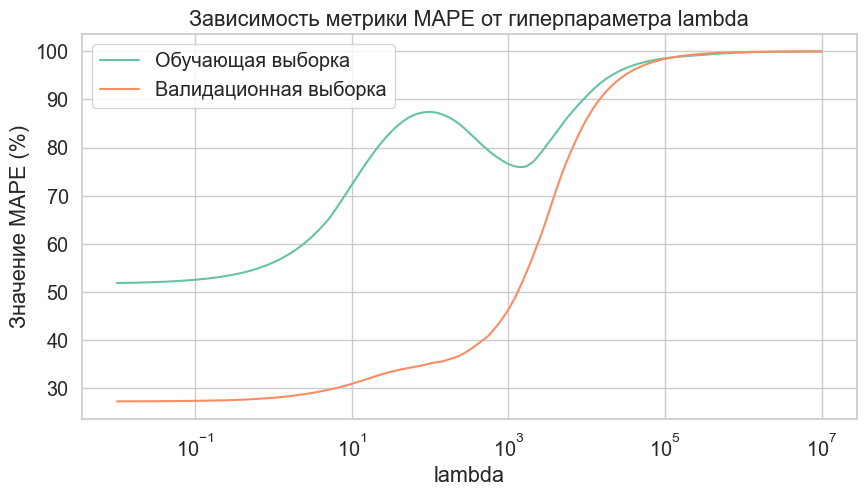

In [ ]:
ax, fig = plt.subplots(figsize=(10,5))
plt.plot(arr_lambda, arr_MAPE_train)
plt.plot(arr_lambda, arr_MAPE_valid)
fig.set_xscale('log')
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
plt.title('Зависимость метрики MAPE от гиперпараметра lambda')
plt.xlabel('lambda')
plt.ylabel('Значение MAPE (%)')
None

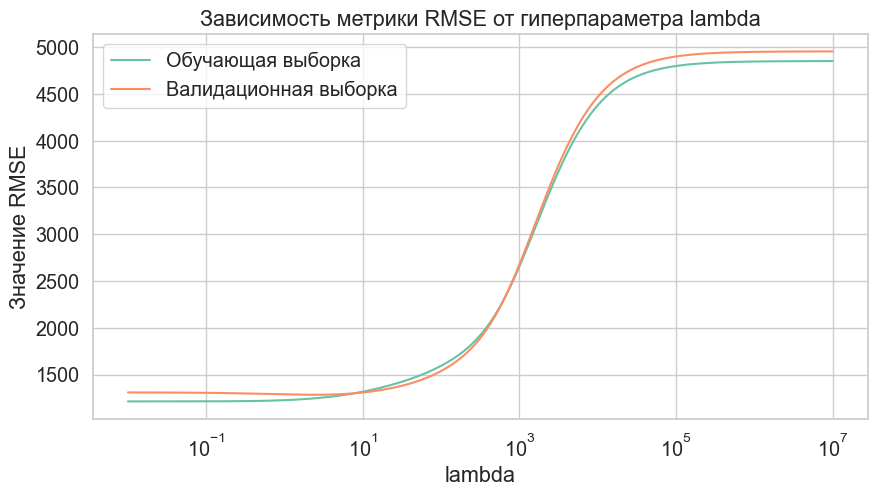

In [ ]:
ax, fig = plt.subplots(figsize=(10,5))
plt.plot(arr_lambda, arr_RMSE_train)
plt.plot(arr_lambda, arr_RMSE_valid)
fig.set_xscale('log')
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
plt.title('Зависимость метрики RMSE от гиперпараметра lambda')
plt.xlabel('lambda')
plt.ylabel('Значение RMSE')
None

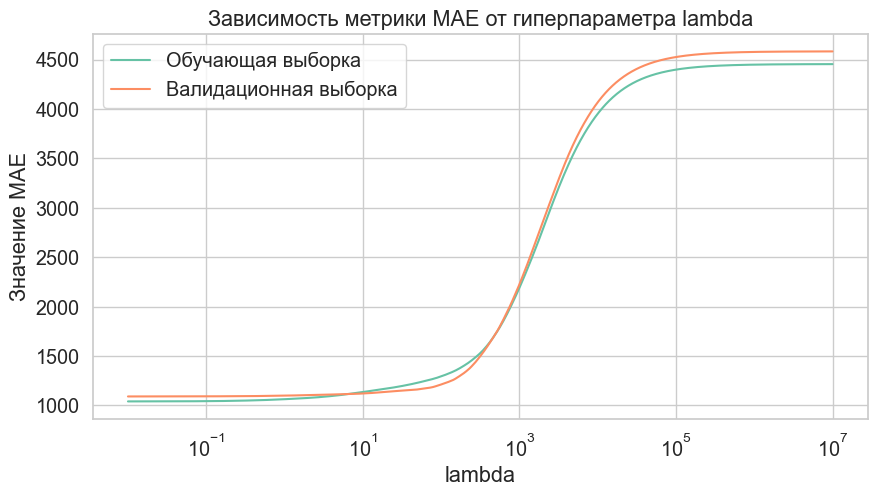

In [ ]:
ax, fig = plt.subplots(figsize=(10,5))
plt.plot(arr_lambda, arr_MAE_train)
plt.plot(arr_lambda, arr_MAE_valid)
fig.set_xscale('log')
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
plt.title('Зависимость метрики MAE от гиперпараметра lambda')
plt.xlabel('lambda')
plt.ylabel('Значение MAE')
None

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

In [ ]:
arr_thet = [[] for i in range(len(arr_ridge[0].theta))]
for i in range(len(arr_ridge)):
    for j in range(len(arr_ridge[i].theta)):
        arr_thet[j].append(arr_ridge[i].theta[j])

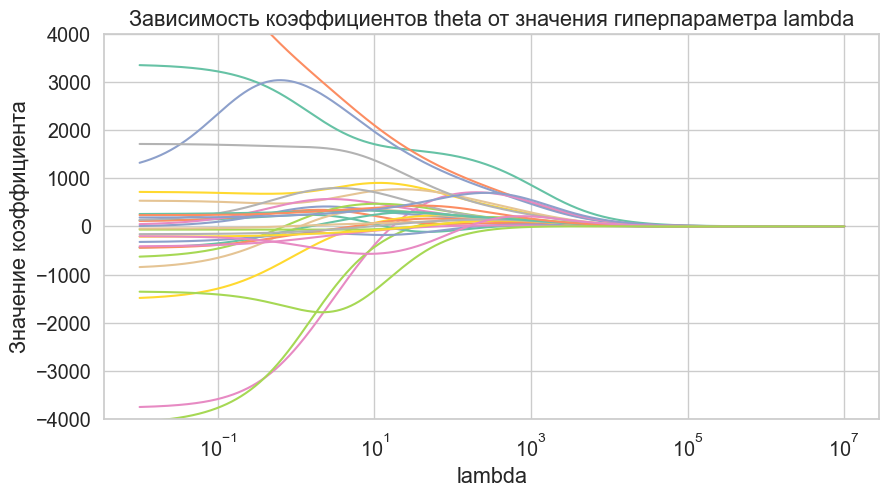

In [ ]:
ax, fig = plt.subplots(figsize=(10,5))
for i in range(len(arr_thet)):
    plt.plot(arr_lambda, arr_thet[i])
plt.ylim((-4000, 4000))
fig.set_xscale('log')
plt.title('Зависимость коэффициентов theta от значения гиперпараметра lambda')
plt.xlabel('lambda')
plt.ylabel('Значение коэффициента')
None

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Для начала подготовим к работе тестовую выборку:

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
test_cat_new = encoder.fit_transform(test_new[categorial_features])
X_test = np.hstack([test_new[real_features], test_cat_new])

In [ ]:
ridge = RidgeRegression(lambd=0.01)
ridge.fit(X_train, train_new['cnt'])
ridge_predict = ridge.predict(X_test)

In [ ]:
mean_absolute_percentage_error(test_new['cnt'], ridge_predict)

32.46474709552101

**Выводы:** 

Мы изучили модель ridge-регрессии, самостоятельно реализовали простейший способ ее получения (явная формула), написали класс RidgeRegression. Далее, по графикам зависимостей метрик от значения гиперпараметра lambda, можно сделать вывод, что оптимальное значение гиперпараметра lambda, при которым наблюдаемые метрики принимаеют наиболее хорошие значения, равно 0.01. Далее, подставив данное значение гиперпараметра в нашу модель, мы проверили точность нашей модели на тестовой выборке и получили хорошую точность предсказания. Также мы изучили зависимость оценочных коэффициентов theta от значения гиперпараметра lambda.

В результате, мы убедились, что модель ridge-регрессии действительно помогает избавиться от проблемы вырожденности матрицы $X^TX$ и позволяет получить точный ответ даже когда в исходном дата фрейме есть зависимые признаки.

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

![bigdata.jpg](attachment:bigdata.jpg)

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

In [ ]:
class RidgeGradRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        self.eta = 0.0001
        self.lambd = lambd
        self.fit_intercept = fit_intercept

        
    def fit(self, X, Y, k=128, count_it=1000):
        '''
        Обучение модели ridge-регрессии.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        self.count_it = count_it
        if self.fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        self.n = X.shape[0]
        self.theta = np.zeros(X.shape[1])
        Y = np.array(Y)
        for i in range(1, self.count_it, 1):
            summarize = np.zeros(X.shape[1])
            index = random.sample(range(0, self.n), k)
            for j in index:
                summarize += (X[j].T * (X[j] @ self.theta - Y[j]))
            self.theta = self.theta * (1 - self.eta * self.lambd) - self.eta * (self.n / k) * summarize
        return self
    
    
    def fit_new(self, X, Y, count_it, X_test, ans):
        k = 256
        self.count_it = count_it
        if self.fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
            X_test = np.insert(X_test, 0, 1, axis=1)
        self.n = X.shape[0]
        self.theta = np.zeros(X.shape[1])
        Y = np.array(Y)
        self.arr_MAPE = []
        self.arr_RMSE = []
        self.arr_MAE = []
        for i in range(1, self.count_it, 1):
            summarize = np.zeros(X.shape[1])
            index = random.sample(range(0, self.n), k)
            for j in index:
                summarize += (X[j].T * (X[j] @ self.theta - Y[j]))
            self.theta = self.theta * (1 - self.eta * self.lambd) - self.eta * (self.n / k) * summarize
            predictions = X_test @ self.theta
            self.arr_MAPE.append(mean_absolute_percentage_error(ans, predictions))
            self.arr_RMSE.append(root_mean_squared_error(ans, predictions))
            self.arr_MAE.append(mean_absolute_error(ans, predictions))
        return self

    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        if self.fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        # Посчитайте предсказания
        predictions = X @ self.theta
        
        return predictions

Опять же разделим данные и закодируем категориальные признаки

In [ ]:
tmp, test_new = train_test_split(data, test_size=0.2)
train_new, valid_new = train_test_split(tmp, test_size=0.25)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
train_cat_new = encoder.fit_transform(train_new[categorial_features])
X_train = np.hstack([train_new[real_features], train_cat_new])

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
valid_cat_new = encoder.fit_transform(valid_new[categorial_features])
X_valid = np.hstack([valid_new[real_features], valid_cat_new])

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [ ]:
ridge_graph_train = RidgeGradRegression()

In [ ]:
count = 100000
ridge_graph_train.fit_new(X_train, train_new['cnt'], count, X_train, train_new['cnt'])

In [ ]:
ridge_graph_valid = RidgeGradRegression()

In [ ]:
count = 100000
ridge_graph_valid.fit_new(X_train, train_new['cnt'], count, X_valid, valid_new['cnt'])

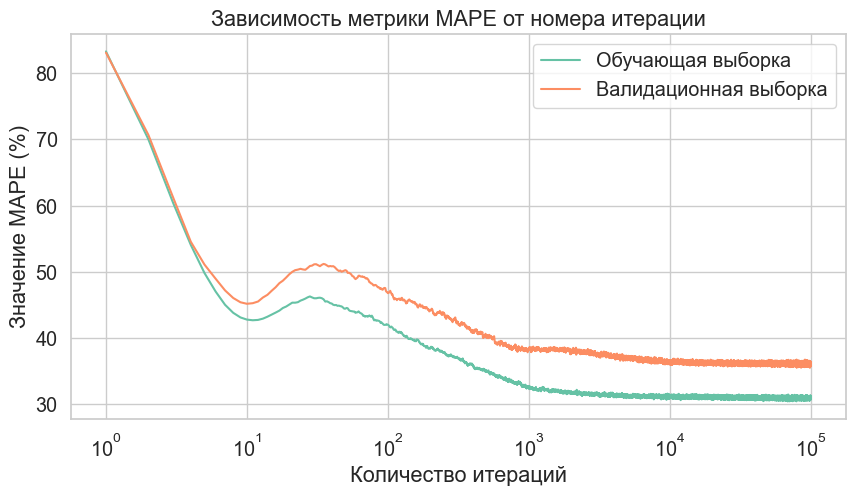

In [ ]:
ax, fig = plt.subplots(figsize=(10,5))
plt.plot([(i + 1) for i in range(count - 1)], ridge_graph_train.arr_MAPE)
plt.plot([(i + 1) for i in range(count - 1)], ridge_graph_valid.arr_MAPE)
fig.set_xscale('log')
plt.title('Зависимость метрики MAPE от номера итерации')
plt.xlabel('Количество итераций')
plt.ylabel('Значение MAPE (%)')
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
None

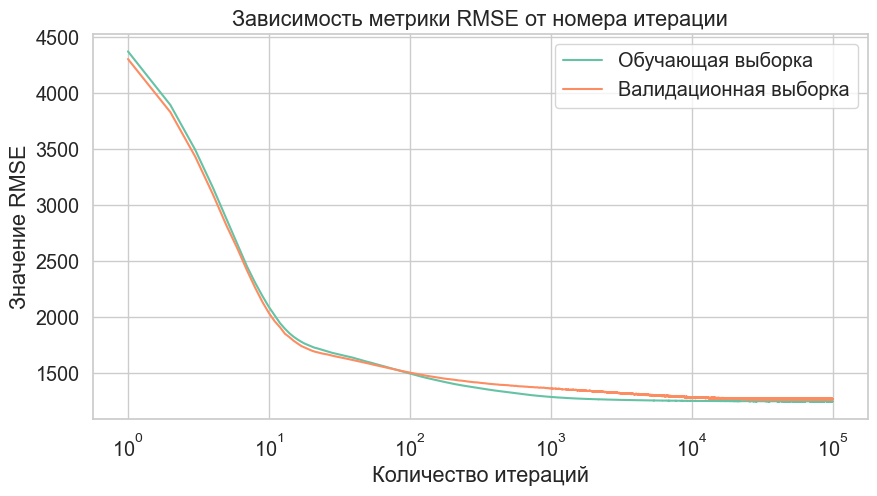

In [ ]:
ax, fig = plt.subplots(figsize=(10,5))
plt.plot([(i + 1) for i in range(count - 1)], ridge_graph_train.arr_RMSE)
plt.plot([(i + 1) for i in range(count - 1)], ridge_graph_valid.arr_RMSE)
fig.set_xscale('log')
plt.title('Зависимость метрики RMSE от номера итерации')
plt.xlabel('Количество итераций')
plt.ylabel('Значение RMSE')
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
None

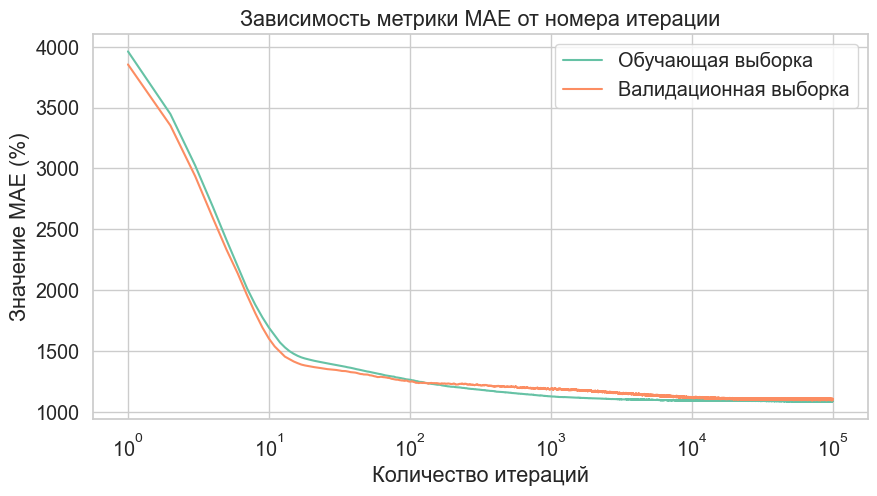

In [ ]:
ax, fig = plt.subplots(figsize=(10,5))
plt.plot([(i + 1) for i in range(count - 1)], ridge_graph_train.arr_MAE)
plt.plot([(i + 1) for i in range(count - 1)], ridge_graph_valid.arr_MAE)
fig.set_xscale('log')
plt.title('Зависимость метрики MAE от номера итерации')
plt.xlabel('Количество итераций')
plt.ylabel('Значение MAE (%)')
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
None

Посчитайте ошибку на тестовой выборке.

Обучаем модель

In [ ]:
ridge = RidgeGradRegression()
ridge.fit(X_train, train_new['cnt'], 256)
None

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
test_cat_new = encoder.fit_transform(test_new[categorial_features])
X_test = np.hstack([test_new[real_features], test_cat_new])

In [ ]:
ridge_predict = ridge.predict(X_test)

Проверяем точность предсказанных значений на тестовой выборке, для метрик MAPE, RMSE, MAE:

In [ ]:
mean_absolute_percentage_error(test_new['cnt'], ridge_predict)

35.944974287981935

In [ ]:
mean_absolute_error(test_new['cnt'], ridge_predict)

1251.3836293923696

In [ ]:
root_mean_squared_error(test_new['cnt'], ridge_predict)

1423.234172022717

Сделайте выводы.

**Выводы:**

Мы самостоятельно реализовали стохастический спуск в модели ridge-регрессии. Изучили зависимость метрик MAE, MAPE, RMSE от количества итераций стохастического спуска и увидели из графика, что для получения хорошей точности необходимо примерно 1000 итераций. Далее обучили нашу модель, как раз сделав 1000 итераций и проверили точность предсказания на тестовой выборке, получили хорошую точность, значит данный способ также работает хорошо.